# **Cars Selling**  🚗


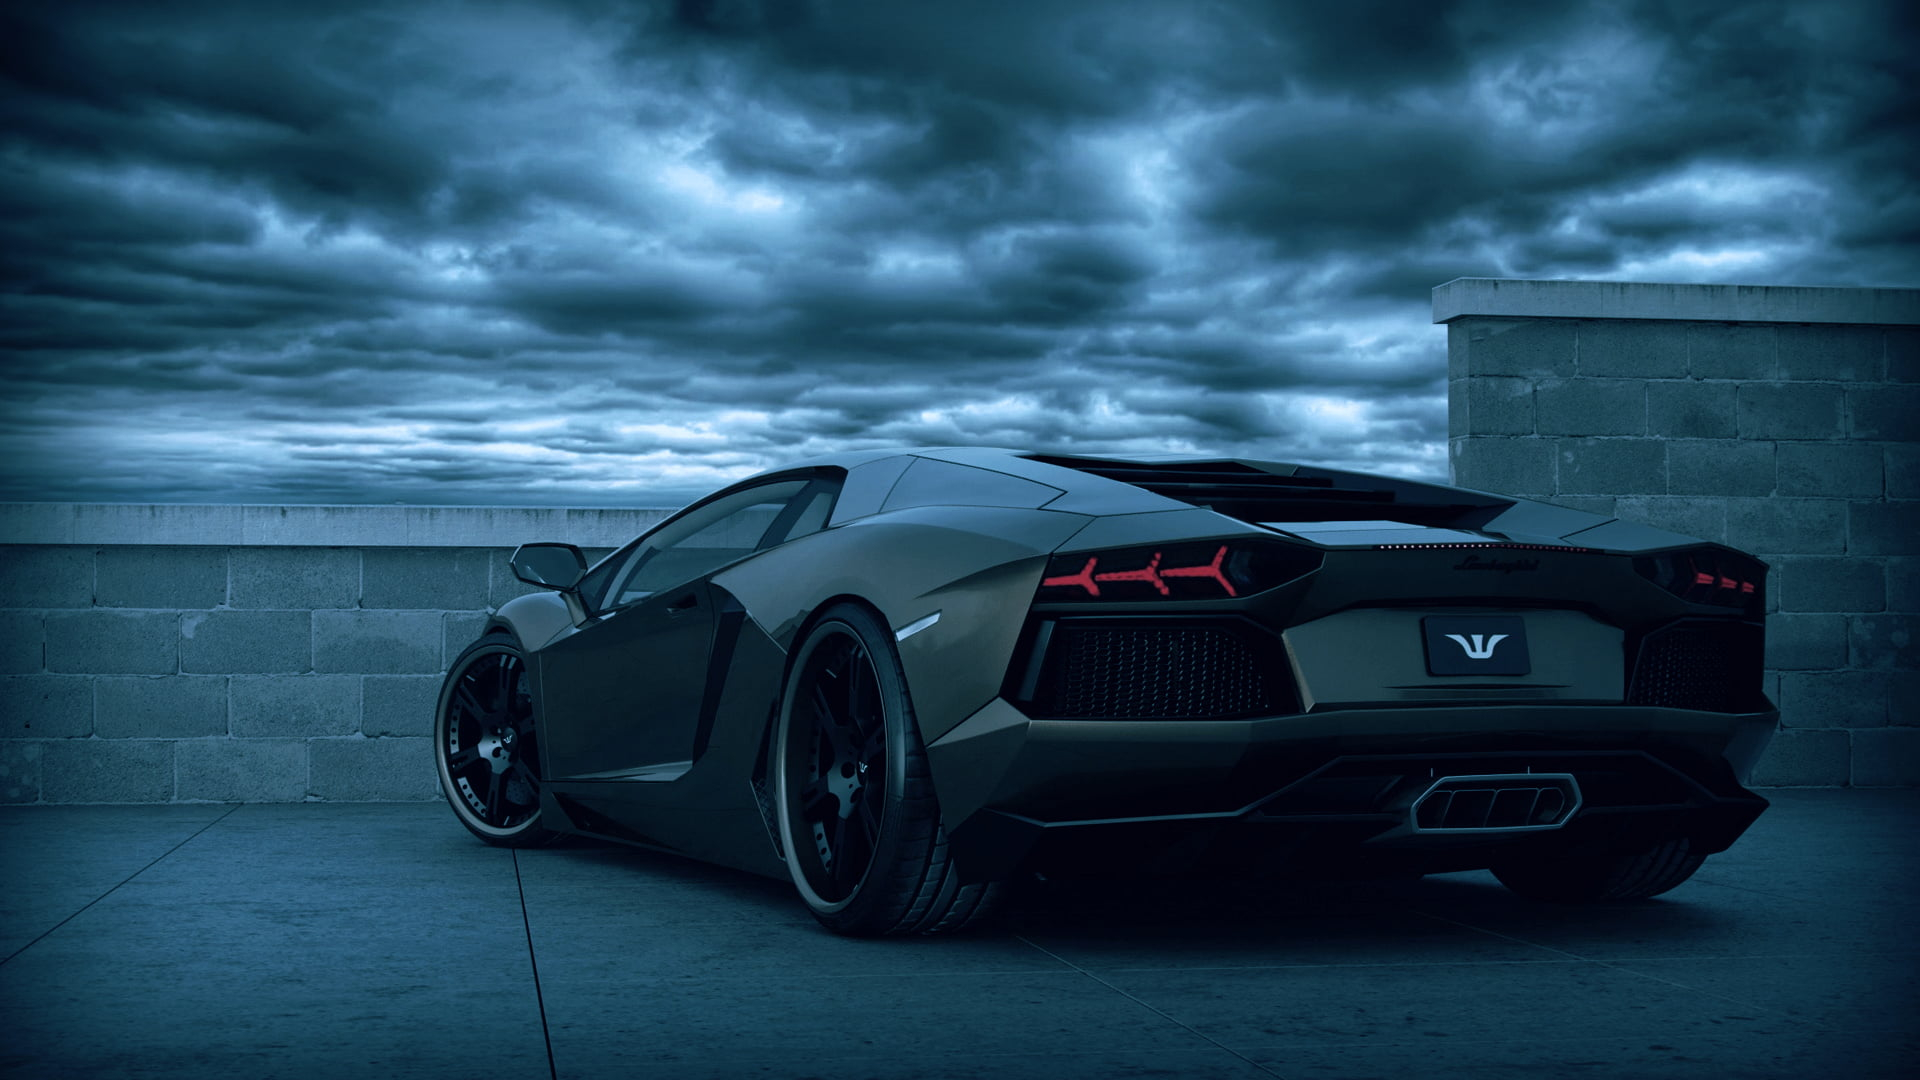

## Import Libraries  📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
!pip install lightgbm
from lightgbm import LGBMRegressor

## Read File  📂

In [2]:
df = pd.read_csv('reg_cars_selling.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Preprocessing  🧹

In [3]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
# Drop rows with missing values from the DataFrame
df.dropna(inplace=True)

In [5]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
# Get the number of rows and columns in the DataFrame
df.shape

(7906, 13)

In [7]:
# Display concise summary of the DataFrame, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


### Change Data Type  🔄

In [8]:
# Convert columns to strings to ensure all values are in string format
df['mileage'] = df['mileage'].astype(str)
df['engine'] = df['engine'].astype(str)
df['max_power'] = df['max_power'].astype(str)

# Extract numeric values from the columns and convert them to appropriate numeric types
df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+)').astype(int)
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)

In [9]:
# Display the data types of each column in the DataFrame
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
torque            object
seats            float64
dtype: object

In [10]:
# To calculate the duplicates
df.duplicated().sum()

1189

In [11]:
# To remove duplicates
df = df.drop_duplicates()

In [12]:
# For statistical calculation
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


### Change Columns Name  📝

In [13]:
# Change colums Name
df.columns = ['Car_Model', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel_Type', 'Seller_Type',
              'Transmission_Type', 'Owner_Type', 'Mileage', 'Engine', 'Max_Power', 'Torque', 'Seats']


In [14]:
# Split the 'Car_Model' column into multiple columns based on spaces and merge with the original DataFrame
df_split = df['Car_Model'].str.split(' ', n=3, expand=True)
df_split.columns = ['Brand', 'Model', 'Details', 'Extra Info']
df = pd.concat([df, df_split], axis=1)

In [15]:
df.head()

,Car_Model,Year,Selling_Price,Km_Driven,Fuel_Type,Seller_Type,Transmission_Type,Owner_Type,Mileage,Engine,Max_Power,Torque,Seats,Brand,Model,Details,Extra Info
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift,Dzire,VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid,1.5,TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City,2017-2020,EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20,Sportz,Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift,VXI,BSIII


In [16]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Car_Model               0
Year                    0
Selling_Price           0
Km_Driven               0
Fuel_Type               0
Seller_Type             0
Transmission_Type       0
Owner_Type              0
Mileage                 0
Engine                  0
Max_Power               0
Torque                  0
Seats                   0
Brand                   0
Model                   0
Details                 0
Extra Info           1096
dtype: int64

In [17]:
# Drop the last column from the DataFrame and display the result
df = df.drop(df.columns[-1], axis=1)
df = df.drop(df.columns[-1], axis=1)
df.head()

,Car_Model,Year,Selling_Price,Km_Driven,Fuel_Type,Seller_Type,Transmission_Type,Owner_Type,Mileage,Engine,Max_Power,Torque,Seats,Brand,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift


In [18]:
# Drop the last column from the DataFrame and display the result
df = df.drop(df.columns[0], axis=1)
df.head()

,Year,Selling_Price,Km_Driven,Fuel_Type,Seller_Type,Transmission_Type,Owner_Type,Mileage,Engine,Max_Power,Torque,Seats,Brand,Model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,Maruti,Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift


In [19]:
# Get the unique values in the 'Brand' column
df['Brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [20]:
# !pip install ydata-profiling
# !pip show ydata-profiling
# from ydata_profiling import ProfileReport
# ProfileReport(df, title="Profiling Report")

## Data Analysis  📊

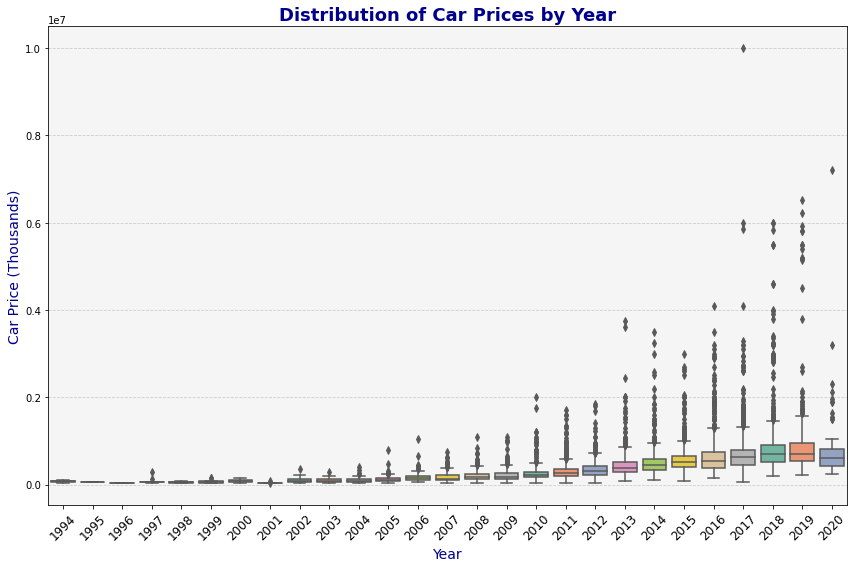

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year', y='Selling_Price', data=df, palette='Set2', width=0.8)
plt.title('Distribution of Car Prices by Year', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('Car Price (Thousands)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xlim(-0.5, len(df['Year'].unique()) - 0.5)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

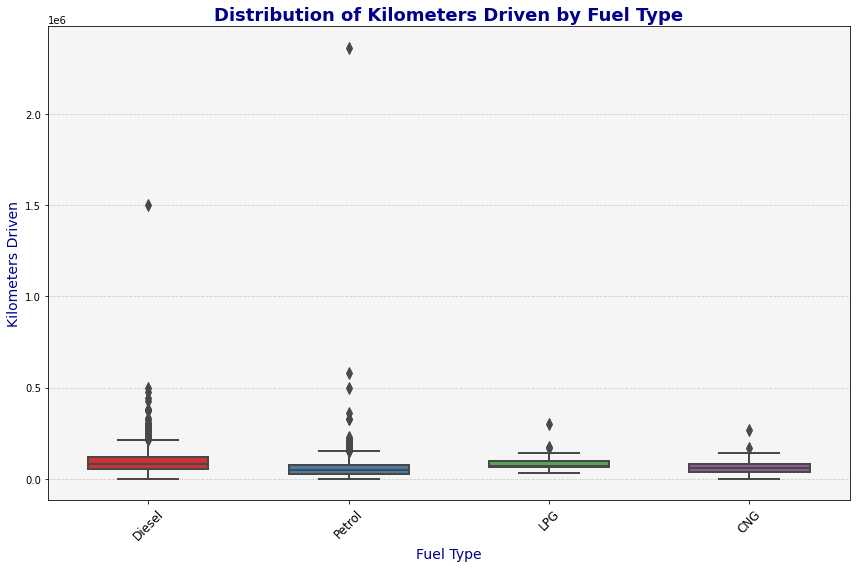

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Fuel_Type', y='Km_Driven', data=df, palette='Set1', width=0.6, fliersize=8, linewidth=2)
plt.title('Distribution of Kilometers Driven by Fuel Type', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14, color='darkblue')
plt.ylabel('Kilometers Driven', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().set_facecolor('whitesmoke')
plt.show()

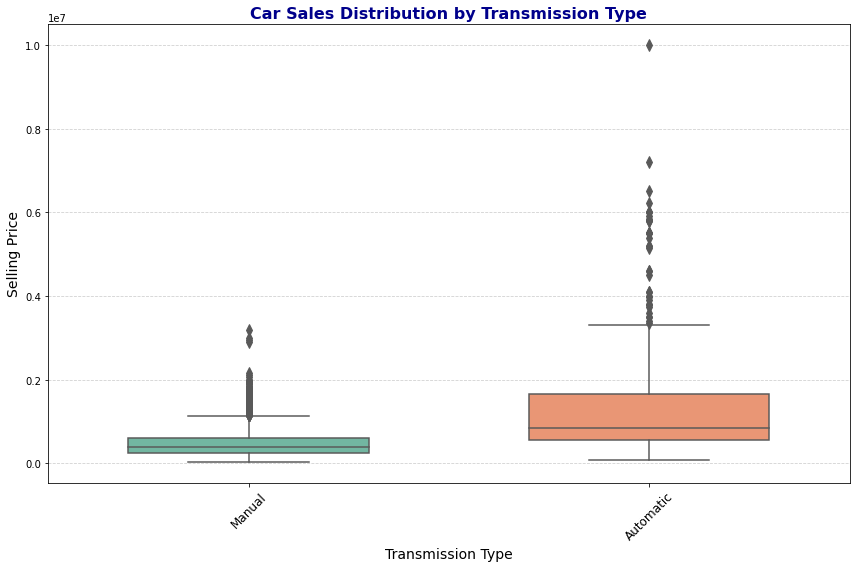

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Transmission_Type', y='Selling_Price', data=df, palette='Set2', width=0.6, fliersize=8)
plt.title('Car Sales Distribution by Transmission Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

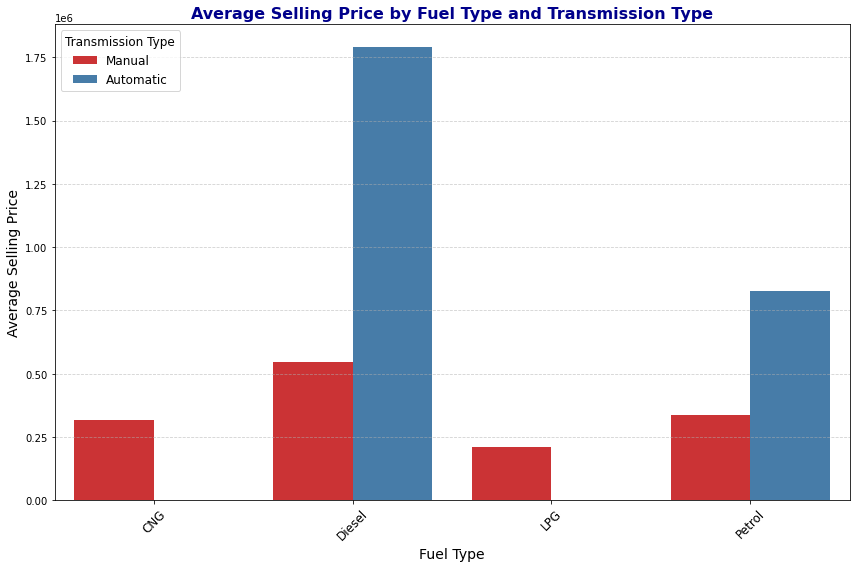

In [24]:
df_grouped = df.groupby(['Fuel_Type', 'Transmission_Type'])['Selling_Price'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x='Fuel_Type', y='Selling_Price', hue='Transmission_Type', data=df_grouped, palette='Set1')
plt.title('Average Selling Price by Fuel Type and Transmission Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Transmission Type', title_fontsize=12, fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

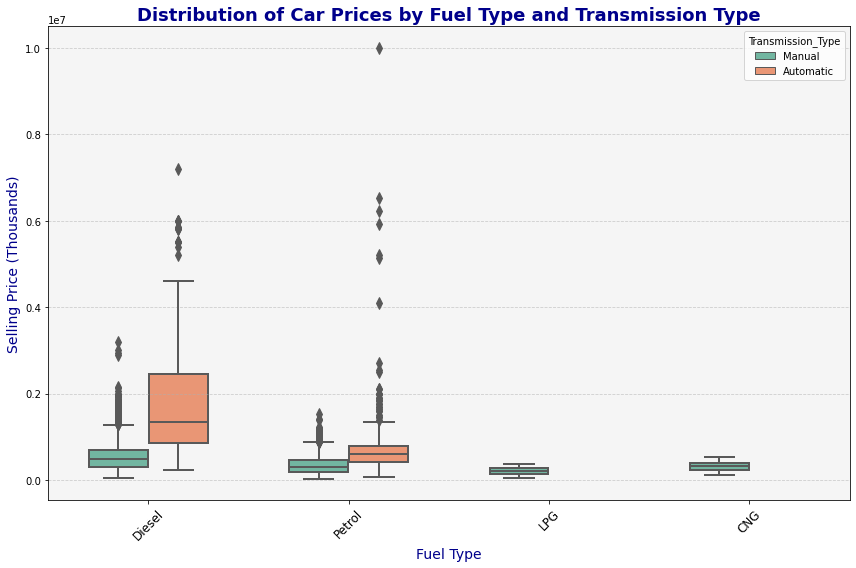

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Transmission_Type', data=df, palette='Set2', width=0.6, fliersize=8, linewidth=2)
plt.title('Distribution of Car Prices by Fuel Type and Transmission Type', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14, color='darkblue')
plt.ylabel('Selling Price (Thousands)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

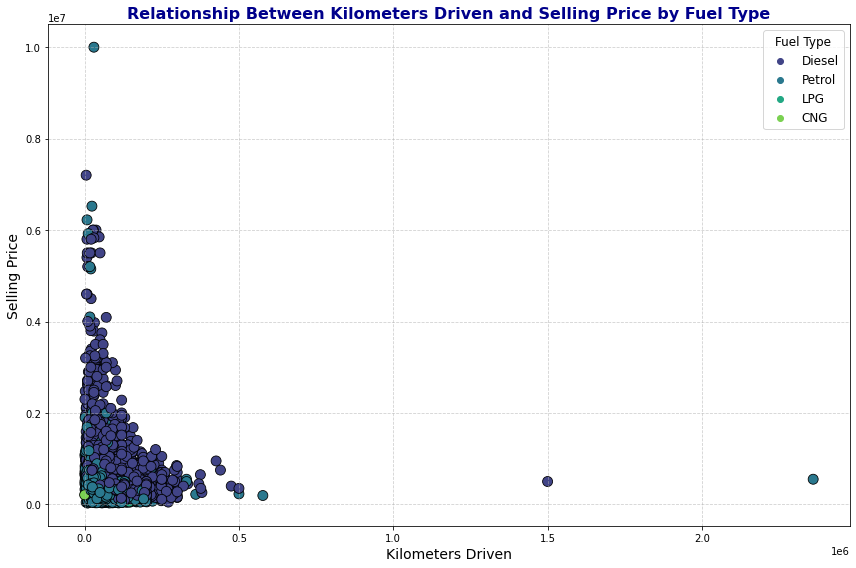

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Km_Driven', y='Selling_Price', data=df, hue='Fuel_Type', palette='viridis', s=100, edgecolor='black', marker='o')
plt.title('Relationship Between Kilometers Driven and Selling Price by Fuel Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.legend(title='Fuel Type', title_fontsize=12, fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

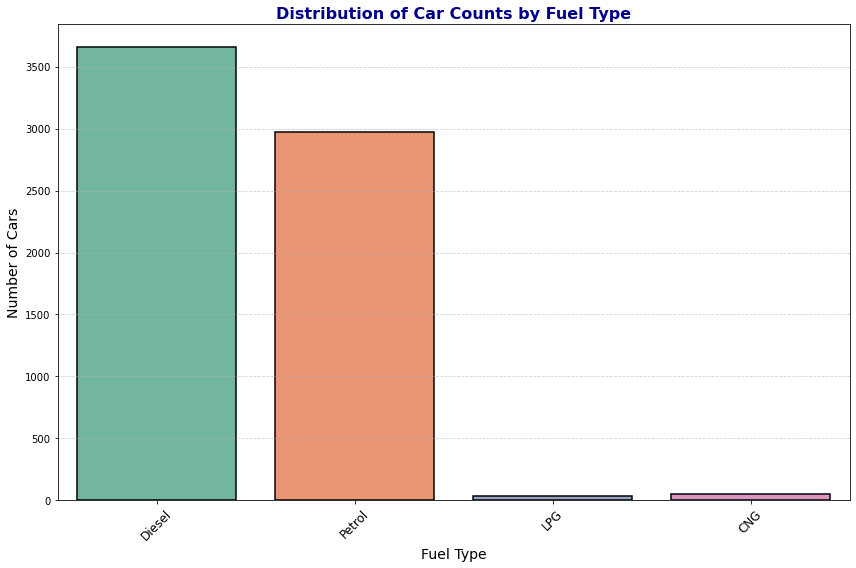

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fuel_Type', data=df, palette='Set2', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Car Counts by Fuel Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

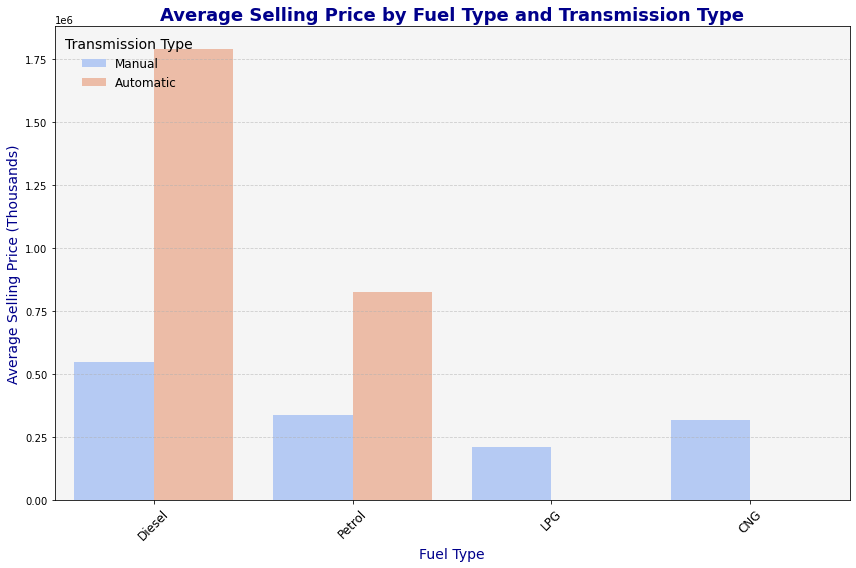

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x='Fuel_Type', y='Selling_Price', hue='Transmission_Type', data=df, ci=None, palette='coolwarm', linewidth=1.5)
plt.title('Average Selling Price by Fuel Type and Transmission Type', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14, color='darkblue')
plt.ylabel('Average Selling Price (Thousands)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.legend(title='Transmission Type', title_fontsize=14, fontsize=12, loc='upper left', frameon=False)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

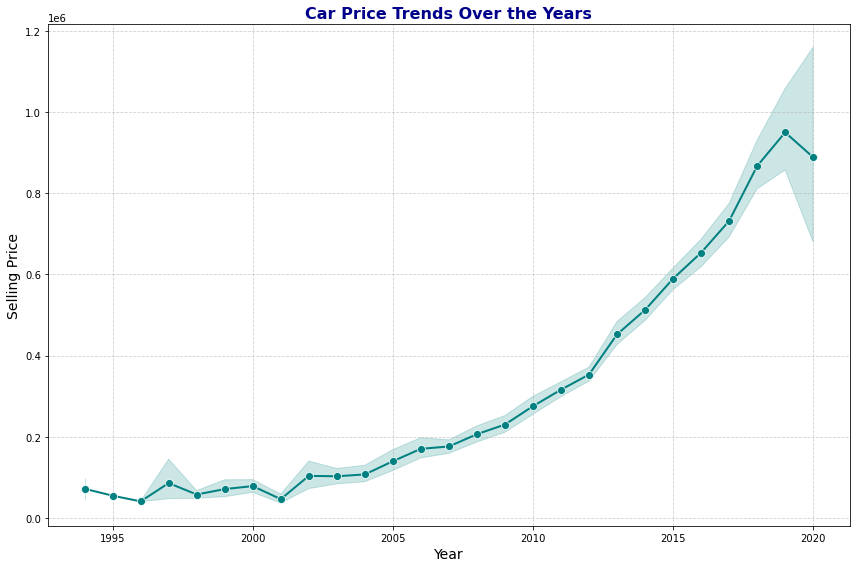

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Selling_Price', data=df, marker='o', color='teal', linewidth=2, markersize=8)
plt.title('Car Price Trends Over the Years', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

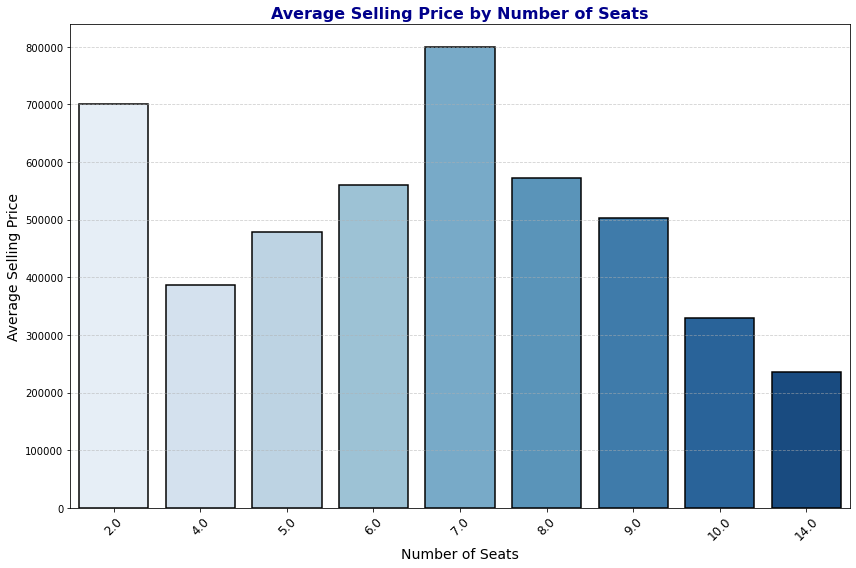

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='Seats', y='Selling_Price', data=df, palette='Blues', ci=None, edgecolor='black', linewidth=1.5)
plt.title('Average Selling Price by Number of Seats', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

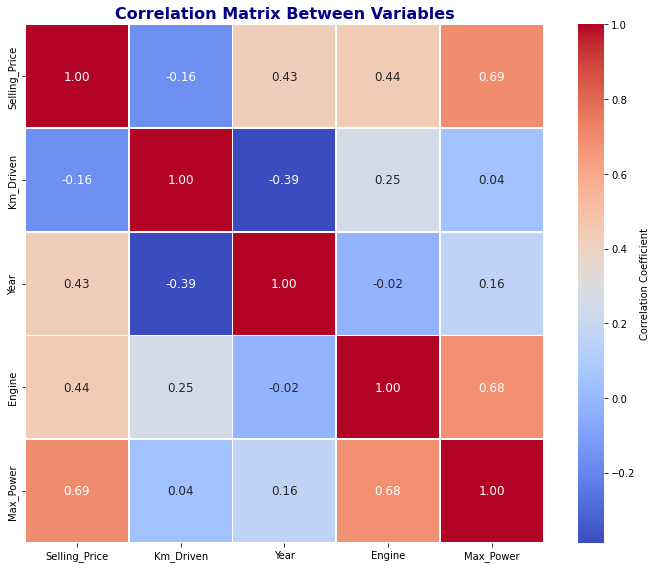

In [31]:
corr_matrix = df[['Selling_Price', 'Km_Driven', 'Year', 'Engine', 'Max_Power', 'Torque']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 12}, square=True)
plt.title('Correlation Matrix Between Variables', fontsize=16, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

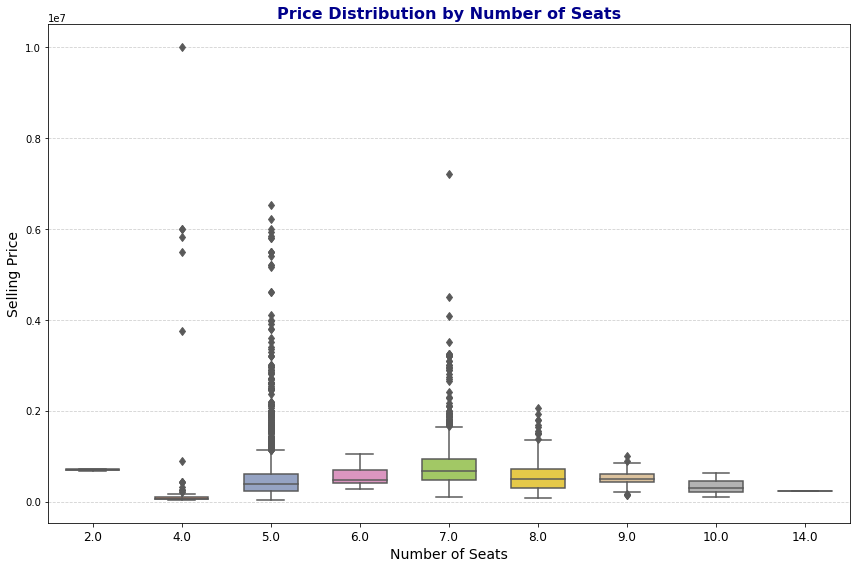

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Seats', y='Selling_Price', data=df, palette='Set2', linewidth=1.5, fliersize=6, width=0.6)
plt.title('Price Distribution by Number of Seats', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

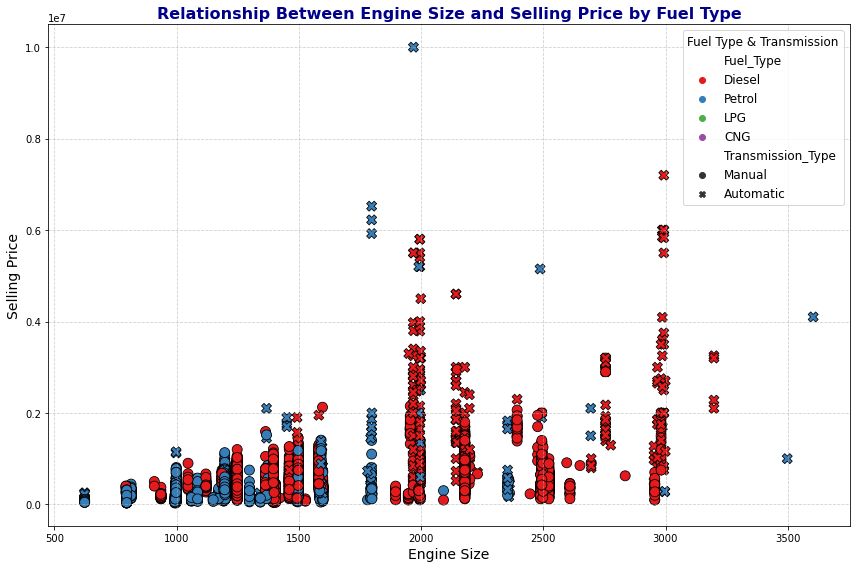

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Engine', y='Selling_Price', data=df, hue='Fuel_Type', palette='Set1', style='Transmission_Type', s=100, edgecolor='black')
plt.title('Relationship Between Engine Size and Selling Price by Fuel Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.legend(title='Fuel Type & Transmission', title_fontsize=12, fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

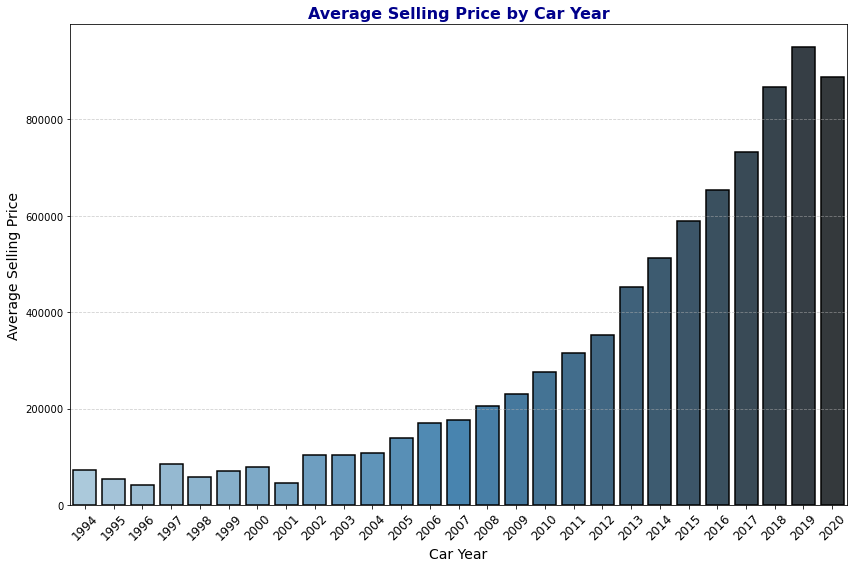

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Selling_Price', data=df, palette='Blues_d', ci=None, edgecolor='black', linewidth=1.5)
plt.title('Average Selling Price by Car Year', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Car Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

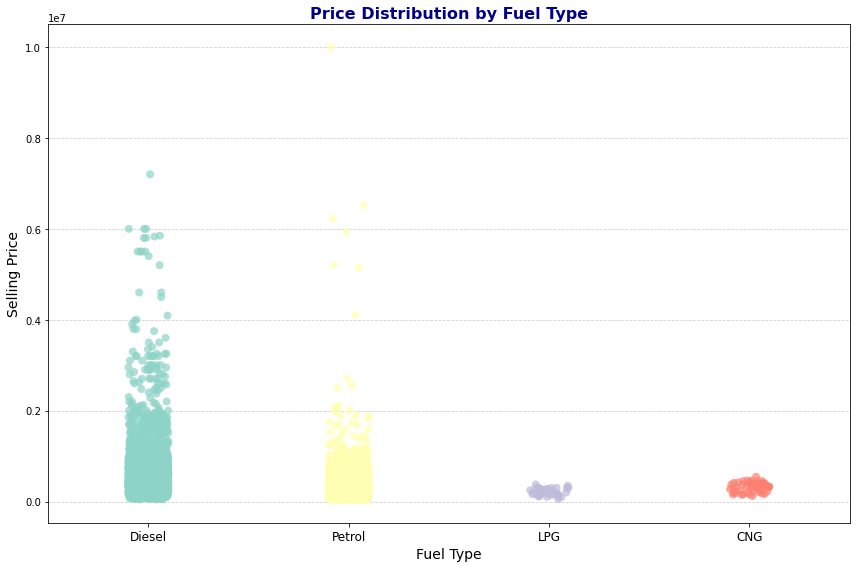

In [35]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Fuel_Type', y='Selling_Price', data=df, jitter=True, dodge=True, palette='Set3', size=8, edgecolor='black', alpha=0.7)
plt.title('Price Distribution by Fuel Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\envs\HCIA\lib\site-packages\pandas\plotting\_matplotlib\style.py:28: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'



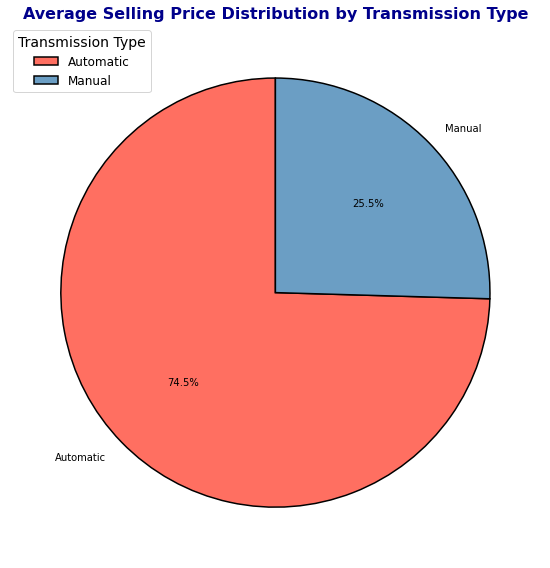

In [36]:
transmission_avg_price = df.groupby('Transmission_Type')['Selling_Price'].mean()
plt.figure(figsize=(8,8))
transmission_avg_price.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', colors=['#FF6F61', '#6B9EC4'], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Average Selling Price Distribution by Transmission Type', fontsize=16, weight='bold', color='darkblue')
plt.ylabel('')
plt.legend(title='Transmission Type', loc='upper left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\envs\HCIA\lib\site-packages\pandas\plotting\_matplotlib\style.py:28: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'



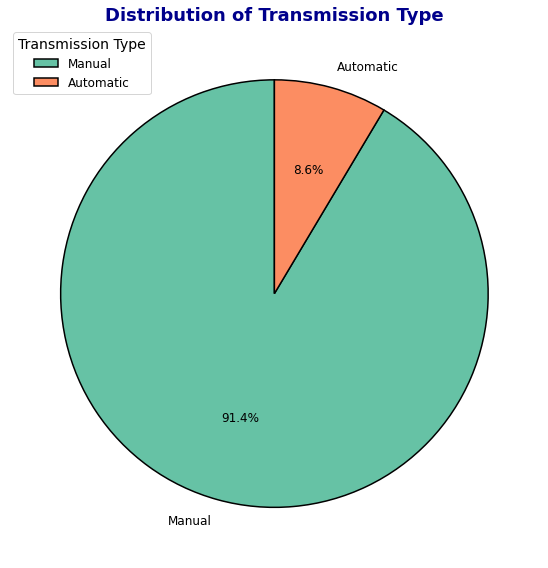

In [37]:
transmission_count = df['Transmission_Type'].value_counts()

plt.figure(figsize=(8,8))

transmission_count.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         cmap='Set2', 
                         colors=['#66C2A5', '#FC8D62'], 
                         wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, 
                         textprops={'color': 'black', 'fontsize': 12})

plt.title('Distribution of Transmission Type', fontsize=18, weight='bold', color='darkblue')
plt.ylabel('')
plt.legend(title='Transmission Type', loc='upper left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

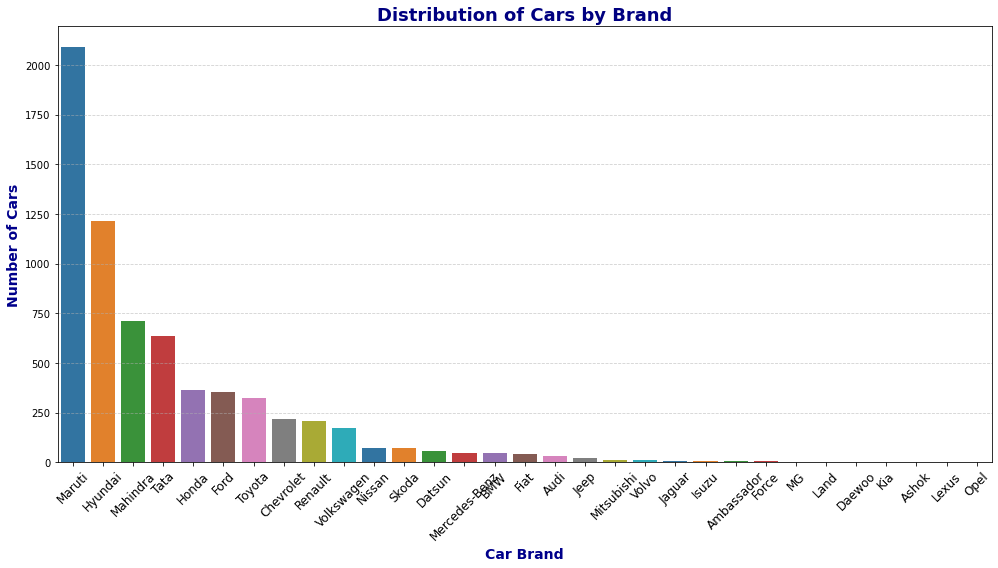

In [38]:
plt.figure(figsize=(14,8))
sns.countplot(x='Brand', data=df, palette='tab10', order=df['Brand'].value_counts().index)
plt.title('Distribution of Cars by Brand', fontsize=18, weight='bold', color='navy')
plt.xlabel('Car Brand', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Number of Cars', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

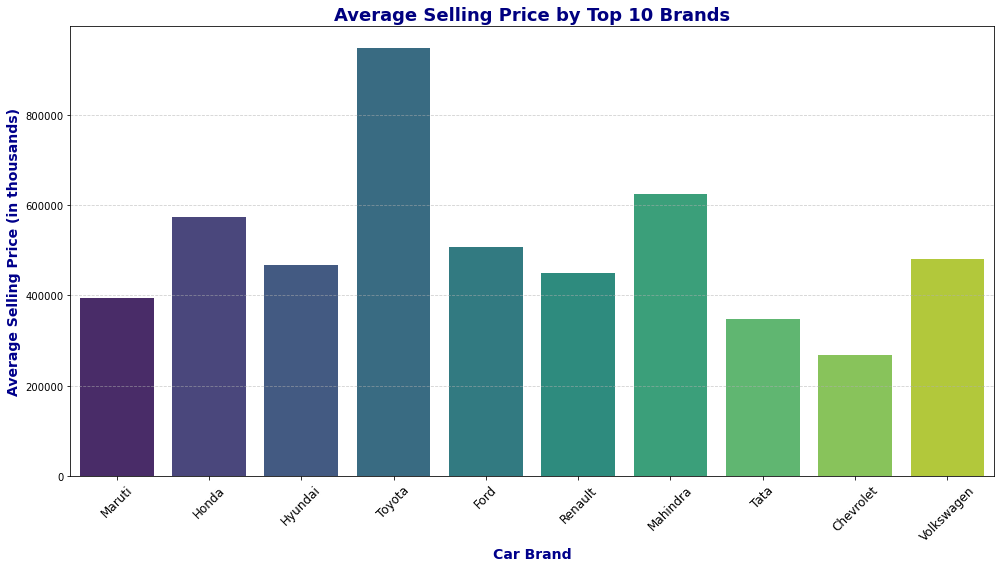

In [39]:
# Define the top 10 brands
top_10_brands = df['Brand'].value_counts().head(10).index
df_top_brands = df[df['Brand'].isin(top_10_brands)]

# Plot the bar chart
plt.figure(figsize=(14,8))
sns.barplot(x='Brand', y='Selling_Price', data=df_top_brands, palette='viridis', ci=None)
plt.title('Average Selling Price by Top 10 Brands', fontsize=18, weight='bold', color='navy')
plt.xlabel('Car Brand', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Average Selling Price (in thousands)', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

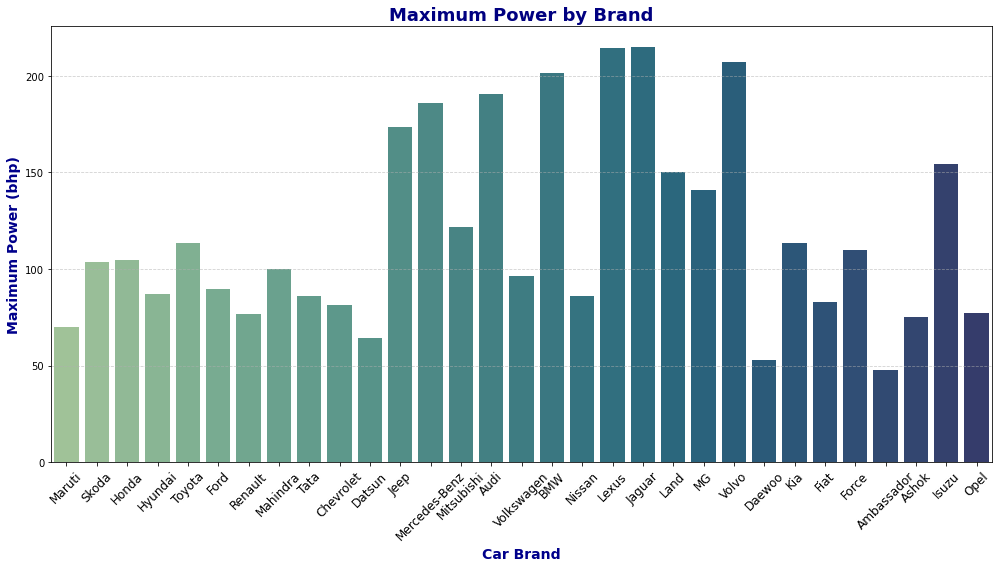

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x='Brand', y='Max_Power', data=df, palette='crest', ci=None)
plt.title('Maximum Power by Brand', fontsize=18, weight='bold', color='navy')
plt.xlabel('Car Brand', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Maximum Power (bhp)', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Save the Clean Data  💾

In [41]:
# df.to_csv('Cars sales.csv', index= False)

In [42]:
df.columns.tolist()

['Year',
 'Selling_Price',
 'Km_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission_Type',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Max_Power',
 'Torque',
 'Seats',
 'Brand',
 'Model']

## Training and saving the model  🤖💻

In [43]:
# Encode categorical columns using LabelEncoder and store the encoders for future use
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission_Type', 'Owner_Type', 'Brand', 'Model', 'Torque']
numerical_cols = ['Year', 'Mileage', 'Engine', 'Max_Power']
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    joblib.dump(le, f"label_encoder_{col.lower()}.pkl")

In [44]:
# Scale numerical columns using StandardScaler for normalization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [45]:
# Preprocessing the Categorical Features
# Select categorical columns (features with object data type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store label encoders for each categorical feature
label_encoders = {}

for col in categorical_columns:
    # Applying Label Encoding to each categorical feature
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Transform and replace the column in the DataFrame
    label_encoders[col] = le  # Save the label encoder for future use

# Save label encoders for future use (serialization)
for col, le in label_encoders.items():
    joblib.dump(le, f"label_encoder_{col.lower()}.pkl")  # Save each label encoder to a file

# Preparing the Feature Set (X) and Target (y)
# Separate features (X) from the target variable (y)
X = df[numerical_cols + categorical_cols]  # Features are a combination of numerical and categorical columns
y = df['Selling_Price']  # Target variable (selling price of cars)

# Feature Selection using SelectKBest
# SelectKBest is a feature selection method that selects the top k features based on the scoring function.
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features based on the f_regression test

# Apply the feature selection to the data
X_new = selector.fit_transform(X, y)  # Apply SelectKBest to find the top features

# Save the SelectKBest model (feature selector) for future use
joblib.dump(selector, "feature_selector.pkl")  # Save the feature selector for reuse

# Get the selected features (the top 5 features)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

# Create a new DataFrame with the selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)
print("Selected features data (head):")
print(X_selected.head())

Selected features: Index(['Year', 'Engine', 'Max_Power', 'Seller_Type', 'Transmission_Type'], dtype='object')
Selected features data (head):
       Year    Engine  Max_Power  Seller_Type  Transmission_Type
0  0.099783 -0.370843  -0.433958          1.0                1.0
1  0.099783  0.135812   0.496621          1.0                1.0
2 -1.953020  0.133786  -0.307863          1.0                1.0
3 -0.926619 -0.070903   0.070421          1.0                1.0
4 -1.696420 -0.269512   0.013678          1.0                1.0


In [46]:
# Split the data into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [47]:
# Train and evaluate multiple regression models, displaying MAE and R² scores

models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)
    print(f"{model_name} MAE: {mae:.2f}, R²: {r2:.2f}")

Linear Regression MAE: 172963.24, R²: 0.65
XGBoost MAE: 76338.95, R²: 0.92
Random Forest MAE: 78751.52, R²: 0.91
Gradient Boosting MAE: 92203.31, R²: 0.90


In [48]:
# Train and evaluate the LGBM model, displaying MAE and R² scores

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LGBM MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("LGBM R²:", r2_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 5373, number of used features: 5
[LightGBM] [Info] Start training from score 530630.150568
LGBM MAE: 86813.50052077768
LGBM R²: 0.8832451938955168


C:\Users\HP\anaconda3\envs\HCIA\lib\site-packages\joblib\externals\loky\backend\context.py:152: UserWarning:

Could not find the number of physical cores for the following reason:
__init__() got an unexpected keyword argument 'capture_output'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\HP\anaconda3\envs\HCIA\lib\site-packages\joblib\externals\loky\backend\context.py", line 229, in _count_physical_cores
    capture_output=True)
  File "C:\Users\HP\anaconda3\envs\HCIA\lib\subprocess.py", line 423, in run
    with Popen(*popenargs, **kwargs) as process:


In [49]:
# Train the XGBoost model and save it as a .pkl file

import joblib
joblib.dump(XGBRegressor(random_state=42).fit(X_train, y_train), 'best_model_xgboost.pkl')

['best_model_xgboost.pkl']

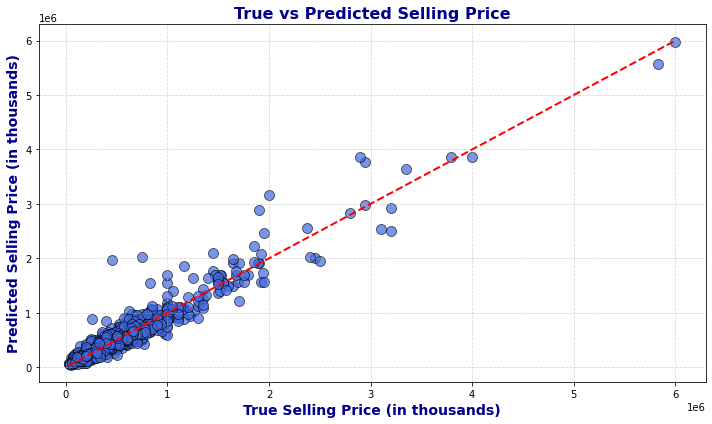

In [50]:
# Plot the true vs predicted values for the selling price using a scatter plot
best_model = joblib.load('best_model_xgboost.pkl')
Y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=Y_pred, color='royalblue', s=100, edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')
plt.title('True vs Predicted Selling Price', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('True Selling Price (in thousands)', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Predicted Selling Price (in thousands)', fontsize=14, weight='bold', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()